Dataset- https://www.kaggle.com/datasets/kmader/parkinsons-drawings/data

In [1]:
from google.colab import files

# Upload the kaggle.json file that you downloaded
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d kmader/parkinsons-drawings

 53% 22.0M/41.4M [00:00<00:00, 108MB/s] 
100% 41.4M/41.4M [00:00<00:00, 137MB/s]


In [4]:
import zipfile
import os

# Specify the path to the downloaded zip file
zip_file_path = '/content/parkinsons-drawings.zip'

# Specify the directory to extract the contents
extracted_path = '/content/'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# List the files in the extracted directory
os.listdir(extracted_path)

['.config',
 'spiral',
 'wave',
 'drawings',
 'parkinsons-drawings.zip',
 'sample_data']

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import classification_report, log_loss, accuracy_score

In [6]:
train_dir = "/content/spiral/training"
test_dir  = "/content/spiral/testing"

IMG_WIDTH, IMG_HEIGHT = (300, 300)
EPOCHS = 50
BATCH_SIZE= 16
CLASSES_NO = 2
print("EPOCHS = {}".format(EPOCHS))
print("BATCH_SIZE = {}".format(BATCH_SIZE))
print("CLASSES_NO = {}".format(CLASSES_NO))

EPOCHS = 50
BATCH_SIZE = 16
CLASSES_NO = 2


In [9]:
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    shuffle=True
)

test = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
)

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


[0. 1.]


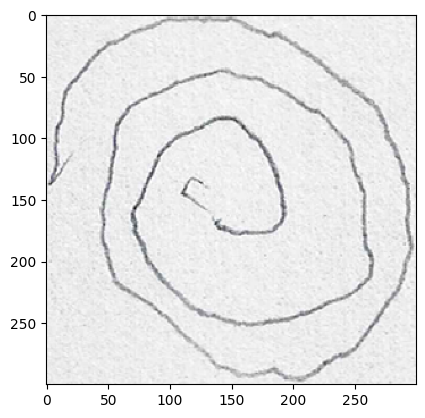

[1. 0.]


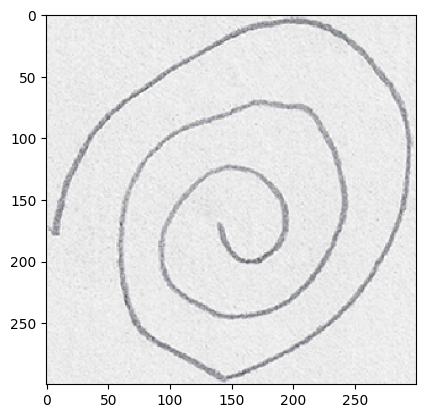

[1. 0.]


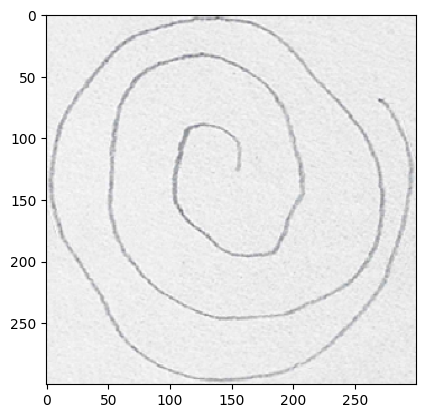

[0. 1.]


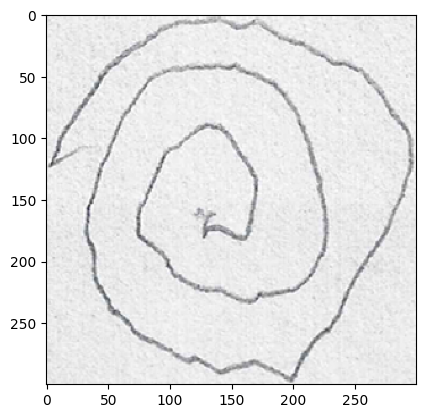

[0. 1.]


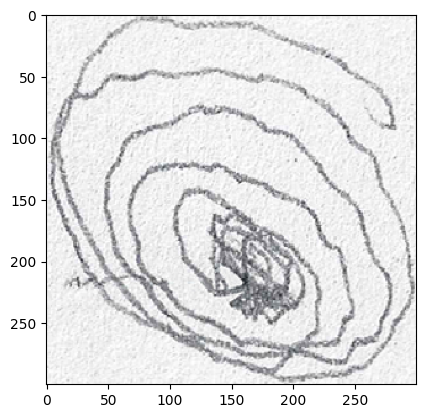

[0. 1.]


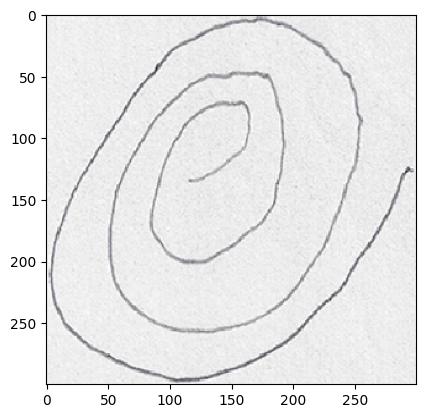

[1. 0.]


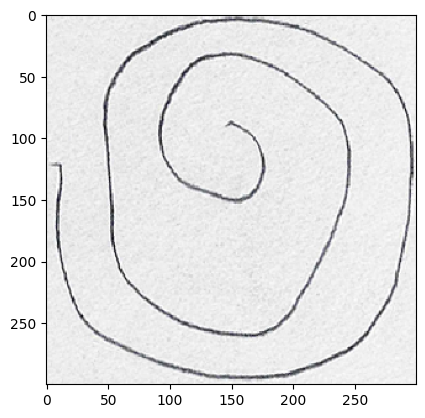

[0. 1.]


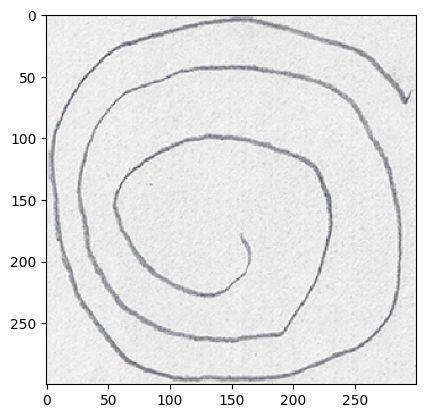

[0. 1.]


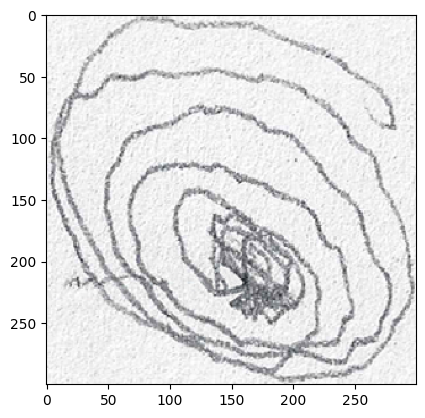

[0. 1.]


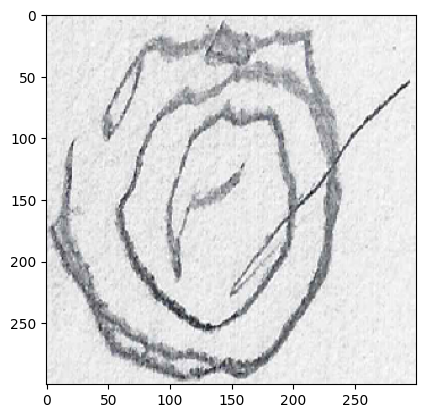

In [11]:
counter = 0
for input_batch, label in train:
    print(label[0])
    plt.imshow(input_batch[0])
    plt.show()
    counter += 1
    if counter == 10:
        break

In [15]:
import keras

In [16]:
def build_model(reg=False):

    regularizers = keras.regularizers.l2(1e-3)

    model = keras.Sequential()

    model.add(keras.layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)))

    model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_regularizer=regularizers))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    model.add(keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_regularizer=regularizers))
    model.add(keras.layers.MaxPooling2D((2, 2)))

    model.add(keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_regularizer=regularizers))
    model.add(keras.layers.MaxPooling2D(2, 2))

    model.add(keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_regularizer=regularizers))
    model.add(keras.layers.MaxPooling2D(2, 2))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(2, activation="softmax"))

    model.summary()

    return model


model = build_model(reg=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 128)       0

In [17]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['acc']
)

In [18]:
history = model.fit(
    train,
    epochs=10,
    batch_size=BATCH_SIZE,
    validation_data=test
)

Epoch 1/10
5/5 [==============================] - 30s 6s/step - loss: 1.0013 - acc: 0.4861 - val_loss: 0.9167 - val_acc: 0.5000
Epoch 2/10
5/5 [==============================] - 27s 5s/step - loss: 0.8995 - acc: 0.5139 - val_loss: 0.8800 - val_acc: 0.5000
Epoch 3/10
5/5 [==============================] - 19s 4s/step - loss: 0.8703 - acc: 0.4444 - val_loss: 0.8520 - val_acc: 0.5000
Epoch 4/10
5/5 [==============================] - 20s 4s/step - loss: 0.8429 - acc: 0.5278 - val_loss: 0.8295 - val_acc: 0.5000
Epoch 5/10
5/5 [==============================] - 21s 4s/step - loss: 0.8227 - acc: 0.5417 - val_loss: 0.8114 - val_acc: 0.5000
Epoch 6/10
5/5 [==============================] - 21s 4s/step - loss: 0.8060 - acc: 0.4583 - val_loss: 0.7972 - val_acc: 0.5000
Epoch 7/10
5/5 [==============================] - 19s 4s/step - loss: 0.7929 - acc: 0.4583 - val_loss: 0.7860 - val_acc: 0.5000
Epoch 8/10
5/5 [==============================] - 21s 4s/step - loss: 0.7829 - acc: 0.4583 - val_loss: 0

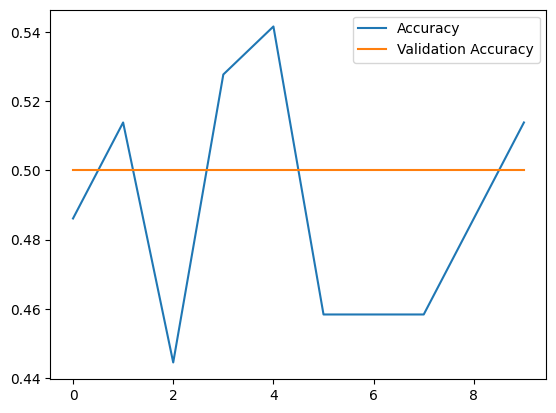

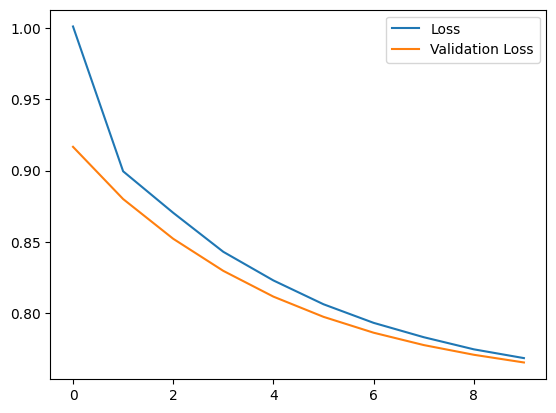

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label="Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.show()


plt.plot(loss, label="Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.show()


In [21]:
model.save('parkinsons_spiral.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
